In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors import KNeighborsClassifier
from random import seed
from random import randrange
from csv import reader
from math import sqrt
%matplotlib inline

In [2]:
dataset = pd.read_csv('data/iris.csv')
dataset.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
from sklearn.preprocessing import LabelEncoder
iris=pd.DataFrame()
dataset=dataset.iloc[:,1:6]
iris["Sepallength"]=dataset.iloc[:,0]
iris["Petallength"]=dataset.iloc[:,2]
iris["outcome"] = dataset.iloc[:,-1]
le = LabelEncoder()
iris.iloc[:,2] = le.fit_transform(iris.iloc[:,2])
print(iris.iloc[:,2])

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: outcome, Length: 150, dtype: int32


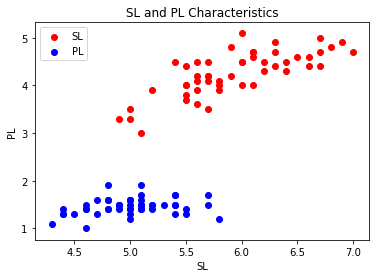

In [4]:

# Look at our data.
plt.scatter(
    iris[iris['outcome'] == 1].Sepallength,
    iris[iris['outcome'] == 1].Petallength,
    color='red'
)
plt.scatter(
    iris[iris['outcome'] == 0].Sepallength,
    iris[iris['outcome'] == 0].Petallength,
    color='blue'
)
plt.legend(['SL', 'PL'])
plt.title('SL and PL Characteristics')
plt.xlabel('SL')
plt.ylabel('PL')
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = iris[['Petallength', 'Sepallength']]
Y = iris.outcome
neighbors.fit(X,Y)

## Predict for a new data points with PL =3.7, SL=1.2
neighbors.predict([[3.7, 1.2]])

array([1])

C:\Users\Yinan\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Attempting to set identical bottom == top == 3.8 results in singular transformations; automatically expanding.


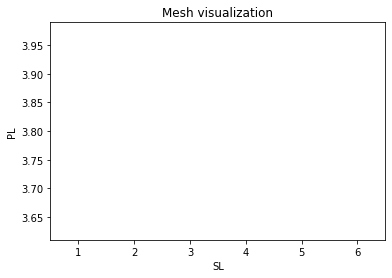

In [6]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 6

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('SL')
plt.ylabel('PL')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()